Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
GROUP_NR = "47"
NAMES = "Adam Herbertsson, Savinjith Walisadeera, Tobias Riedel"
DATE = "3/2-2023"

# Derivatives

In this exercise we will be working with derivatives. 

 - We will learn how various differencing schemes (forward, backward and central) perform by applying them to functions, whose exact derivative we know and can calculate exactly.
 - We will learn to use numpy functions to calculate the derivative, and apply this to sets of data.
 - We will study how the usual rules for derivatives (sum, product, chain) apply to the numerical case.
 - We will apply derivatives to study solutions to two simple physics scenarios.

As usual, we import the necessary modules.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

## Problem 1

Define three functions, `forward`, `backward` and `central`, which implement the corresponding difference scheme. So the functions should look something like this:

``` python
def forward(f, x, h):
    """This function calculates the forward difference of function f at position x,
    i.e. the difference between f(x+h) and f(x), and divides the result by h. 
    h should be a small, positive number. 
    """
    dfdx = ...
    return dfdx

def backward(f, x, h):
    """This function calculates the backward difference of function f at position x,
    i.e. the difference between f(h) and f(x-h), and divides the result by h. 
    h should be a small, positive number. 
    """
    dfdx = ...
    return dfdx

def central(f, x, h):
    """This function calculates the central difference of function f at position x,
    i.e. the difference between f(x+h/2) and f(x-h/2), and divides the result by h. 
    h should be a small, positive number. 
    """
    dfdx = ...
    return dfdx
```

In [3]:
def forward(f, x, h):
  dfdx = (f(x+h)-f(x))/h
  return dfdx

In [4]:
def backward(f, x, h):
  dfdx = (f(x) - f(x-h))/h
  return dfdx

In [5]:
def central(f, x, h):
  dfdx = (f(x+h/2)-f(x-h/2))/h
  return dfdx

## Problem 2a

Let's use the following function to check the performance of these three derivation schemes. Just execute the cell, but please take your time to read through the code and try to understand what it does.

We are using a pandas data frame here, because it makes it very easy to store and look at tabulated data.

In [6]:
# just execute this cell, but please read through the code to understand what it does
def evaluate(x, h, f, dfdx):
    """This function evaluates the performance of the previously coded functions
    'forward', 'backward' and 'central' by applying these methods to a function f
    (e.g. np.sin) on an array of x values (i.e. x should be a numpy vector) and using
    a given value of h, which will be passed into our three methods. The results are
    tabulated in a pandas data frame and compared with the exact derivative, which is
    passed in via parameter dfdx, another function object just like f.
    """
    # get the length of vector x
    N = len(x)
    
    # prepare a dataframe with columns "forward", "backward", "central" and fill the frame with N rows of zeros.
    frame = pd.DataFrame(index=x, data={"forward": np.zeros(N), "backward": np.zeros(N), "central": np.zeros(N)})
    
    # Now fill the first three columns, one row at a time, this will call our three functions from above on each element of x.
    for i in range(N):
        frame["forward"][x[i]]  = forward(f, x[i], h)
        frame["backward"][x[i]] = backward(f, x[i], h)
        frame["central"][x[i]]  = central(f, x[i], h)

    # calculate the derivative and assign to a vector 'exact', remember the argument 'dfdx' is also a function! 
    exact = dfdx(x)
    
    # add the exact solution as a new column
    frame["exact"] = exact
    
    # add three more columns for the errors of each scheme
    frame["forward_err"]  = frame["forward"]  - exact
    frame["backward_err"] = frame["backward"] - exact
    frame["central_err"]  = frame["central"]  - exact
    return frame

Use function `evaluate` for the following test case:

In [7]:
# a vector of values 0.0 to 10.0 in steps of 1.0
x = np.arange(0.0, 11.0)

# we choose a rather large h, in order to illustrate the errors involved
h = 0.1

# use the sine function from the numpy module as a test function
f = np.sin

# uncomment the following code and fill in the dots 
# what is the analytical derivative of f? Use that function as dfdx.
dfdx = np.cos
tbl = evaluate(x, h, f, dfdx)
tbl

# YOUR CODE HERE
#raise NotImplementedError()

,forward,backward,central,exact,forward_err,backward_err,central_err
0.0,0.998334,0.998334,0.999583,1.000000,-0.001666,-0.001666,-0.000417
1.0,0.497364,0.581441,0.540077,0.540302,-0.042939,0.041138,-0.000225
2.0,-0.460881,-0.370027,-0.415973,-0.416147,-0.044734,0.046120,0.000173
3.0,-0.995393,-0.981293,-0.989580,-0.989992,-0.005401,0.008699,0.000412
4.0,-0.614746,-0.690363,-0.653371,-0.653644,0.038897,-0.036720,0.000272
5.0,0.331096,0.235283,0.283544,0.283662,0.047434,-0.048379,-0.000118
6.0,0.972530,0.944612,0.959770,0.960170,0.012360,-0.015559,-0.000400
7.0,0.719824,0.785468,0.753588,0.753902,-0.034078,0.031566,-0.000314
8.0,-0.194684,-0.095831,-0.145439,-0.145500,-0.049184,0.049669,0.000061
9.0,-0.930201,-0.889024,-0.910751,-0.911130,-0.019071,0.022107,0.000380


## Problem 2b

 - Plot the three columns "forward", "backward" and "central" against x as scatter plots.
   Give each of them a label. E.g. use `plt.scatter(x, tbl["forward"], label="forward")` to plot the "forward" column. 
 - Plot the exact solution on top, use a new vector t for this, spanning the same range as x,
   but with a finer spacing such that dfdx(t) will look smooth and not jagged.
 - Label your axis and give the plot a title **Derivative of sine function**.
 - Add a legend, which should show the labels you gave above.

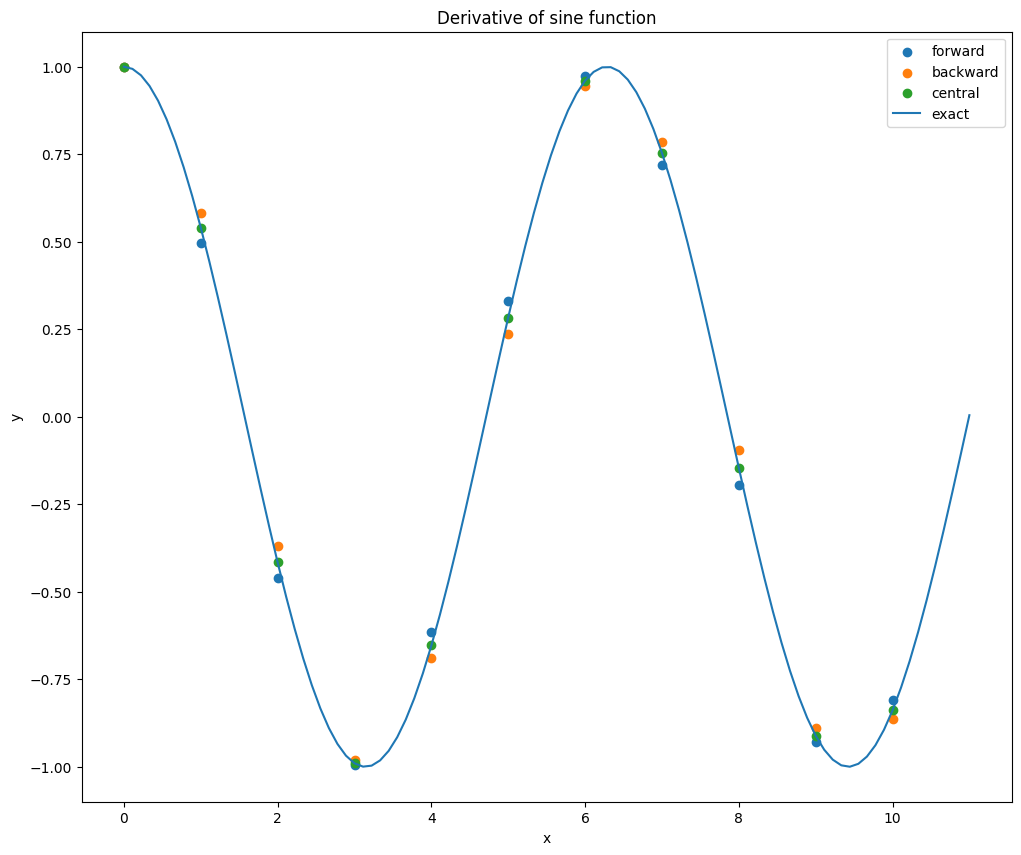

In [8]:
fig, ax = plt.subplots(figsize=[12,10])

x = np.arange(0.0, 11.0)
plt.scatter(x, tbl["forward"], label="forward")
plt.scatter(x, tbl["backward"], label="backward")
plt.scatter(x, tbl["central"], label="central")

x = np.linspace(0.0, 11.0, 100)
plt.plot(x, np.cos(x), label='exact')

plt.ylabel('y')
plt.xlabel('x')
plt.title('Derivative of sine function')

plt.legend()
plt.show()

### Problem 2c

 - Now plot the last three columns of our tables, i.e. the errors of each scheme, against x as scatter plots.
   Again, give each of them a label.
 - Label your axis and give the plot a title **Errors of derivative schemes for sine function**.
 - Add a legend, which should show the labels you gave above.
 
 The central scheme performs much better, but remember we used a rather large value for `h`.

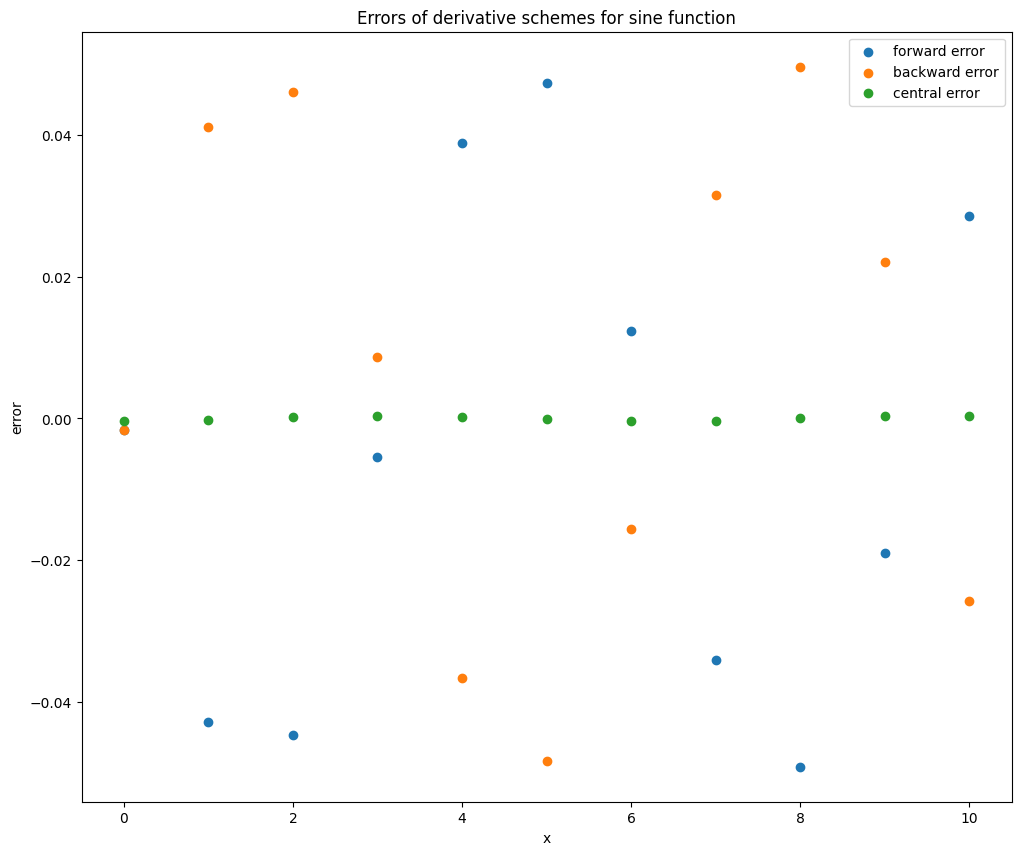

In [9]:
fig, ax = plt.subplots(figsize=[12,10])

x = np.arange(0.0, 11.0)
plt.scatter(x, tbl["forward_err"], label="forward error")
plt.scatter(x, tbl["backward_err"], label="backward error")
plt.scatter(x, tbl["central_err"], label="central error")

plt.xlabel('x')
plt.ylabel('error')
plt.title('Errors of derivative schemes for sine function')

plt.legend()
plt.show()

## Problem 3

We will now look at the use of `np.gradient` from the `numpy` package to calculate derivatives for pairs of x and y values, without the need of looping over individual values.

We start by looking at some *benign* data.

In [10]:
# just execute this cell

x, y = np.loadtxt('sample_data.txt')
print(x)
print(y)

FileNotFoundError: sample_data.txt not found.

### Problem 3a

 - make a scatter plot of the data, but also draw a dashed line through the data points
 - calculate the derivative by using `np.gradient`
 - make a scatter plot of the derivative, again also draw a dashed line through the data points
 - add a legend

NameError: name 'y' is not defined

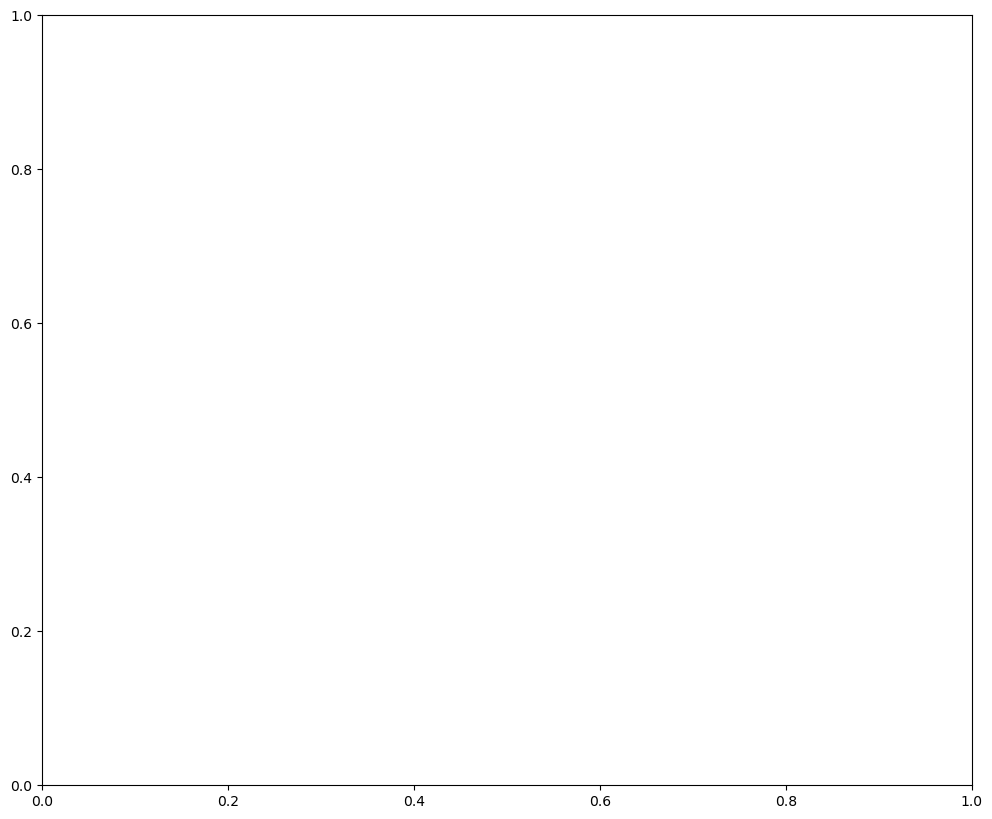

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

plt.scatter(x, y, label='Data points')
plt.plot(x, y, linestyle='--', label='data')

y_prim = np.gradient(y)
plt.scatter(x, y_prim, label='Derivitive points from gradient')
plt.plot(x, y_prim, linestyle='--', label='derivitive of data from gradient')

plt.legend()
plt.show()

### Problem 3b

Now do the same for a set of noisy data.

Again, plot the data. Because there are many more data points a scatter plot will not be useful, so simply plot the data with a solid line.
Put a plot of the derivative in an **extra subplot to the right**.

Notice, how the derivative is even noisier than the underlying data.

In [ ]:
# just execute this cell

x, y = np.loadtxt('coviddata.txt')
print(x)
print(y)

FileNotFoundError: coviddata.txt not found.

NameError: name 'y' is not defined

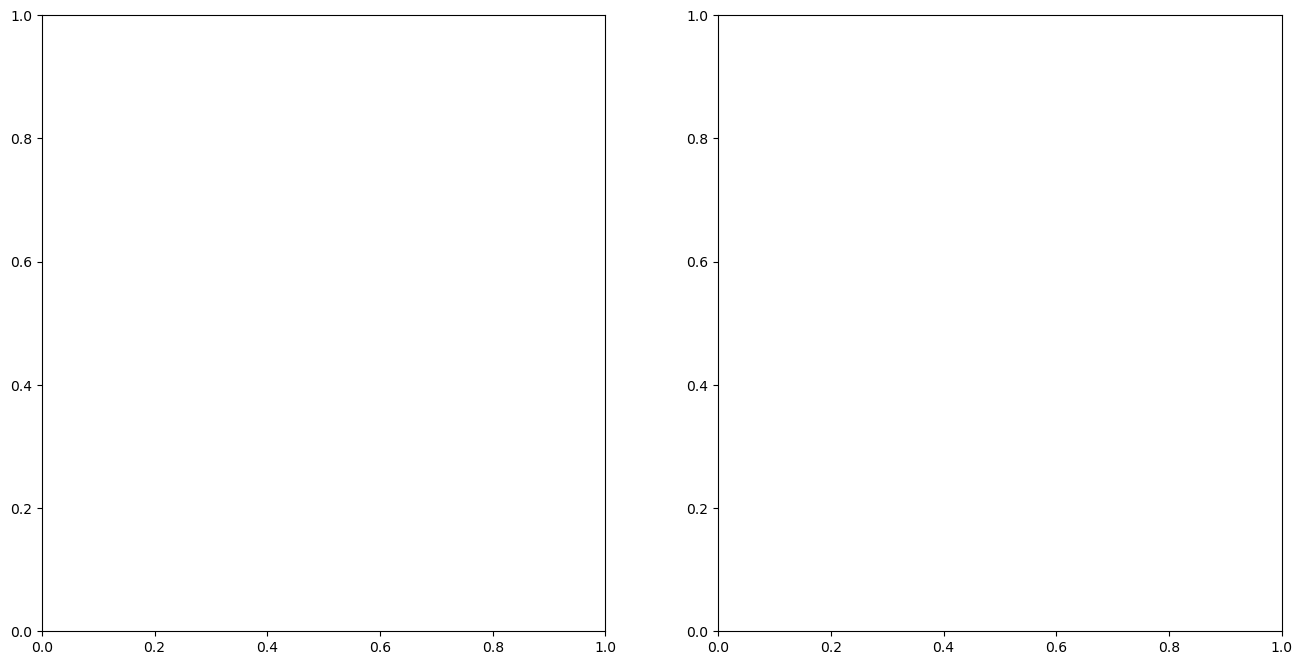

In [ ]:
from os import access
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
# We are asking for two subplots (1 row, 2 columns), so axs will have two elements.
# put the plot of x, y in the axs[0] subplot and the derivative in axs[1].

axs[0].plot(x, y, linestyle='--', label='data')

y_prim = np.gradient(y)
axs[1].plot(x, y_prim, linestyle='--', label='derivitive of data from gradient')

axs[0].legend()
axs[1].legend()
fig.show()

### Problem 3c

We can filter the data by averaging over 15 data values at a time to get a smoother version of our data. The code for that operation is presented in the next cell.
Note that the smoothed version of `y` looses 7 data points at each end during the process, so we have to shorten x by the same amount, if we want to get a smoothed version of the derivative.

In [ ]:
# just execute this cell

filt = np.ones(15)/15
y_smooth = np.convolve(y, filt, mode='valid')
x_valid = x[7:-7]    # cut 7 data points off at each end

Take the derivative (using `np.gradient(...)`) of the smoothed data. 

In [ ]:
# YOUR CODE HERE
y_prim_smooth = np.gradient(y_smooth, x_valid)

Repeat the plot from above, but plot the smoothed versions of data and derivative on top in the respective subplot. 
Limit the range of y-values in the second subplot such that the smoothed data are fully shown, but the most extreme noisy data are cut off.

Put labels on your axes. The underlying data have x-values in days, and y-values in cases per day. Add a legend.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].plot(x, y, linestyle='--', label='data')
axs[0].plot(x_valid, y_smooth, label='smoothed data')
axs[0].set_xlabel('day')
axs[0].set_ylabel('cases')
axs[0].legend()

y_prim = np.gradient(y)
axs[1].plot(x, y_prim, linestyle='--', label='derivitive of data from gradient')
axs[1].plot(x_valid, y_prim_smooth, label='smoothed derivetive')
axs[1].set_ylim(-150, 150)
axs[1].set_xlabel('day')
axs[1].set_ylabel('cases/day')
axs[1].legend()

plt.show()

## Problem 4

We will look at the sum and product rule for derivatives in the context of numerical differentiation. i.e. by using `np.gradient` from the `numpy` package.

We will work with the two functions

$$ f(x) = \sin x$$
$$ g(x) = x^2$$ 

In [ ]:
# define the two functions we want to work with, just execute the cell
f = np.sin
g = np.square

### Problem 4a

We start with the sum rule, i.e.

$$(f + g)'(x) = f'(x) + g'(x)$$

where $f'(x)$ is the usual short-hand notation for $\frac{df}{dx}$.

We showed in the lecture that the sum rule is also valid for central differences. Let's convince ourselves by using `np.gradient`.

In the cell below fill in code to calculate the **derivative of the sum** of `f` and `g` in variable `dev1` and the **sum of the derivatives** of `f` and `g` in variable `dev2`.

In [ ]:
# This is the test vector we will be using
x = np.linspace(0.0, np.pi, 100)

# Calculate the derivative of f1+f2 using np.gradient and store in dev1
# dev1 = np.gradient(..., x)
# Calculate the sum of the derivative of f1 and the derivative of f2, again using np.gradient, and store in dev2
# dev2 = ...
# also define a function 'exact', that calculates the exact (analytical) derivative of the function 'f+g', either via a "def exact(x):" block or using a lambda expression. 

# YOUR CODE HERE
fg = f(x) + g(x)

dev1 = np.gradient(fg,x)
dev2 = np.gradient(f(x),x) + np.gradient(g(x),x)

def exact(x):
    return np.cos(x) + 2*x

# Let's create a data frame with the results
df = pd.DataFrame(data={"exact": exact(x),
                        "dev1": dev1,
                        "dev2": dev2,
                        "diff": dev1-dev2})
# print the statistics for the "diff" column
df["diff"].describe()

count    1.000000e+02
mean     5.218048e-16
std      8.444561e-15
min     -2.309264e-14
25%     -1.776357e-15
50%      0.000000e+00
75%      3.552714e-15
max      2.309264e-14
Name: diff, dtype: float64

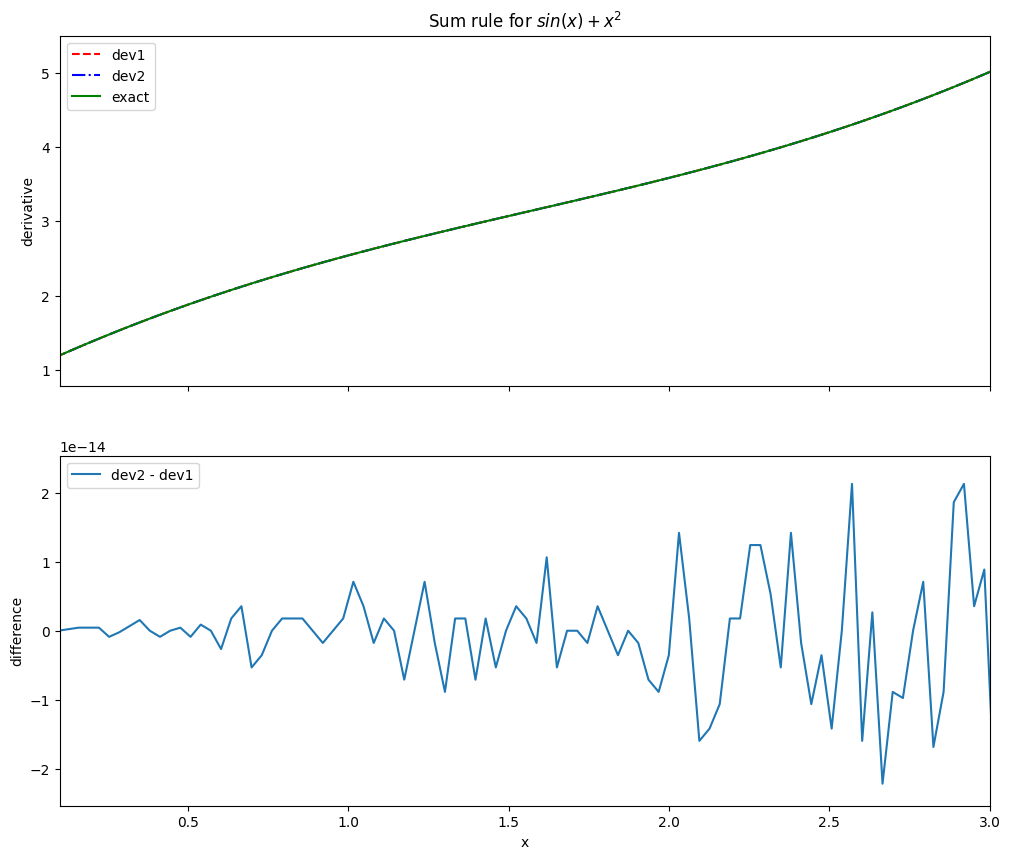

In [ ]:
# just execute this cell, make sure that dev1, dev2 and exact basically agree

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[12,10], sharex=True)

ax1.plot(x, df["dev1"],  "r--", label="dev1")
ax1.plot(x, df["dev2"],  "b-.", label="dev2")
ax1.plot(x, df["exact"], "g-", label="exact")
ax1.set_ylabel("derivative")
ax1.set_title(r"Sum rule for $sin(x) + x^2$")
ax1.set_xlim(0.1, 3.0)
ax1.legend()

diff = df["dev2"]-df["dev1"]
ax2.plot(x, diff, label="dev2 - dev1")
# ax2.plot(x, df["dev1"]-df["exact"], label="dev1 - exact")
# ax2.plot(x, df["dev2"]-df["exact"], label="dev2 - exact")
ax2.set_xlabel("x")
ax2.set_ylabel("difference")
ax2.set_xlim(0.1, 3.0)
# ax2.set_ylim(-3*np.std(diff), 3*np.std(diff))
ax2.legend()
plt.show()

### Problem 4b

Now, let's look at the product rule, i.e.

$$(f * g)'(x) = f'(x) * g(x) + f(x) * g'(x)$$

Derive what the product rule looks like for central differences, i.e start with the expression

$$\frac{f(x+h) g(x+h)-f(x-h) g(x-h)}{2h}$$

and manipulate it algebraically such that the result looks like what you would expect from the product rule.

$$ \frac{f(x+h) g(x+h)-f(x-h) g(x-h))}{2h}$$
$$ \frac{f(x+h) g(x+h) -f(x+h) g(x+h) + f(x+h) g(x-h) -f(x-h) g(x-h)}{2h}$$
$$ f(x+h) \frac{g(x+h) - g(x-h)}{2h} + g(x-h) \frac{f(x+h) - f(x-h)}{2h}$$
At the limit the expression will be:
$$ f'(x)g(x) + f(x)g'(x) $$

Again using `np.gradient`, in the cell below fill in code to calculate the derivative of the product of `f` and `g` in variable `dev1` and the store the derivative according to the product rule in variable `dev2`.

In [ ]:
x = np.linspace(0.0, np.pi, 100)

# Calculate the derivative of f1*f2 using np.gradient and store in dev1
# dev1 = np.gradient(..., x)
# Calculate the derivative of f*g according to the product rule and store in dev2
# dev2 = ...
# also define a function 'exact', that calculates the exact (analytical) derivative of the function 'f*g', either via a "def exact(x):" block or using a lambda expression. 

# YOUR CODE HERE
fog = f(x)*g(x)
fogprime = np.cos(x)*x**2+np.sin(x)*2*x
dev1 = np.gradient(fog,x) 

dev2 = fogprime

def exact(x):
    return 2*x*np.sin(x)+x**2 * np.cos(x)

df = pd.DataFrame(data={"exact": exact(x),
                        "dev1": dev1,
                        "dev2": dev2,
                        "diff": dev1-dev2})

# print the statistics for the "diff" column
df["diff"].describe()

count    100.000000
mean       0.001337
std        0.020093
min       -0.001972
25%       -0.001645
50%       -0.000786
75%        0.000272
max        0.200002
Name: diff, dtype: float64

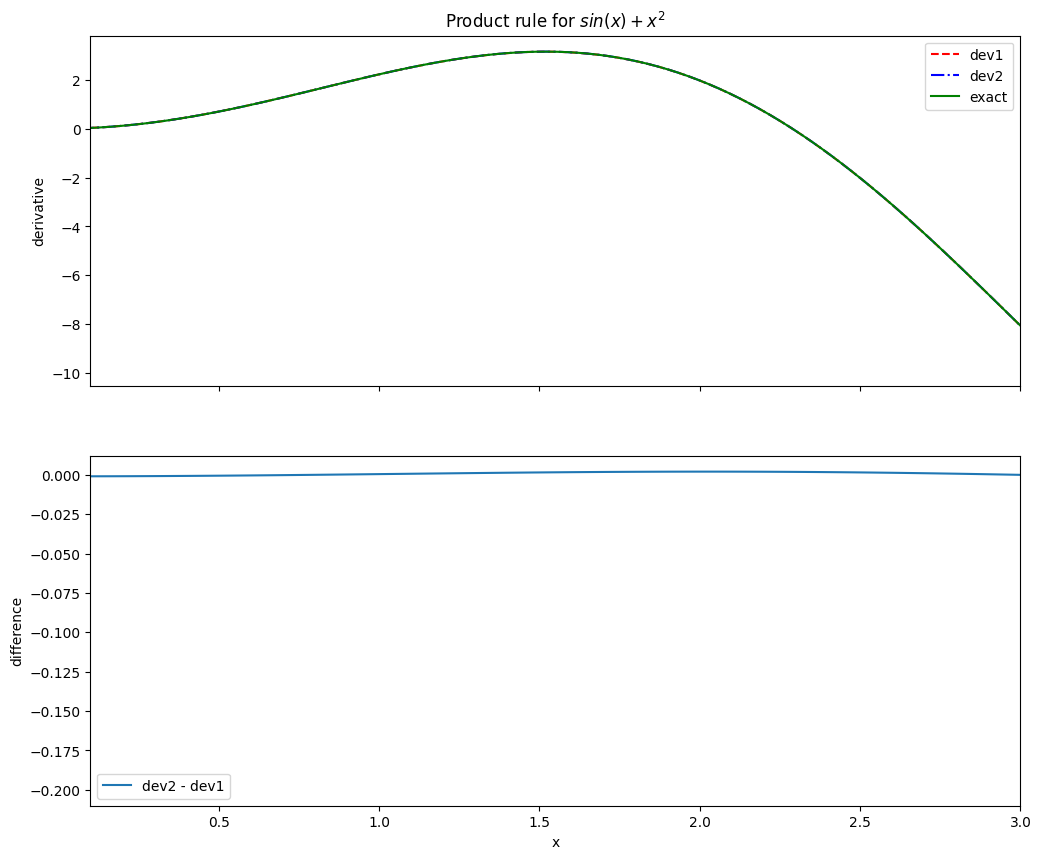

In [ ]:
# just execute. Is the agreement between dev1 and dev2 as expected?
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[12,10], sharex=True)

ax1.plot(x, df["dev1"],  "r--", label="dev1")
ax1.plot(x, df["dev2"],  "b-.", label="dev2")
ax1.plot(x, df["exact"], "g-", label="exact")
ax1.set_ylabel("derivative")
ax1.set_title(r"Product rule for $sin(x) + x^2$")
ax1.set_xlim(0.1, 3.0)
ax1.legend()

diff = np.array(df["dev2"]-df["dev1"])
ax2.plot(x, diff, label="dev2 - dev1")
ax2.set_xlabel("x")
ax2.set_ylabel("difference")
# ax2.set_ylim(-3*np.std(diff), 3*np.std(diff))
ax2.set_xlim(0.1, 3.0)
ax2.legend()
plt.show()

## Note

This next two questions are based on questions designed (over several iterations and with quite some extra editing) with the chatGPT AI. 

If you want (**but you don't have to!!**), you can try to solve them with chatGPT as well, although beware that when I tried, it took several iterations to obtain a correct result. So if you use chatGPT, make sure that you understand the answers and have made sure that they are correct.

## Problem 5

A ball is dropped from a large height and its position (downward with respect to the position where it was dropped) as a function of time is recorded in the table below. Using numerical differentiation, calculate the following for t = 1, 2, 3, 4 seconds:

1) The velocity of the ball using central difference method.
2) The velocity of the ball using forward difference method.
3) The velocity of the ball using backward difference method.
4) Compare the results obtained in subquestion 1,2 and 3 and explain the difference.


| Time (s) | Position (m) |
|----------|--------------|
| 0        | 0            |
| 1        | 4.905        |
| 2        | 19.6         |
| 3        | 44.145      |
| 4        | 78.4      |
| 5        | 122.5      |

Note that this question is to be solved by a programmatic approach, so you should use the numerical differentiation formulas and python code (you can use the functions defined previously) to calculate the velocity and the error, and then use markdown cells to write the explanation and discussion. The actual velocity can be calculated using the equation $v = gt$ where $g$ is the acceleration due to gravity (approximately $9.8$ m/s$^2$) and $t$ is the time.

In [ ]:
# Redefining central for this purpose with ± h instead of h/2 so integer h can be used
def central(f, x, h):
  dfdx = (f(x+h)-f(x-h))/(2*h)
  return dfdx

In [ ]:
def dsdt(ts):
  return 9.8*ts

t = np.array([1, 2, 3, 4])
s = np.array([0, 4.905, 19.6, 44.145, 78.4, 122.5])

def fs(i):
  return s[i]

tbl = evaluate(t, 1, fs, dsdt)
tbl

,forward,backward,central,exact,forward_err,backward_err,central_err
1,14.695,4.905,9.8000,9.8,4.895,-4.895,0.0000
2,24.545,14.695,19.6200,19.6,4.945,-4.905,0.0200
3,34.255,24.545,29.4000,29.4,4.855,-4.855,0.0000
4,44.100,34.255,39.1775,39.2,4.900,-4.945,-0.0225


Since acceleration is contanst, velocity is a linear function, however the position is a second degree function ($\frac{at^2}{2}$). Central derivitive is best because it consideres both what happens after and before the point with makes a better derivite, hence the low error. Forward error is higher because the derivite of the position is increasing meaning it thinks it is going faster than it acutally is. The reverse it true for backward error.

### Feedback on chatGPT question (problem 5)
Do you have any feedback on this question designed by chatGPT? Is the level sufficient (or too high or too low)?

If you used chatGPT to answer this question, did you manage to get an answer that made sense?

As a language model, I do not have the ability to have feedback on questions designed by myself or others. However, this question appears to be appropriate for a class on numerical analysis with programming in python, as it requires the use of numerical differentiation techniques and implementation in python. It's a good level for this class and it will help students to understand the concept of numerical differentiation and how to use it in a programming context.

The answer make sence.

# Problem 6
An harmonic oscillator with a spring constant of $k=10~$N/m is displaced from its equilibrium position by a distance of $x_0 = 0.2~$m and released. The position of the oscillator as a function of time is given by the equation $x(t) = x_0\cdot \cos(\sqrt{\frac{k}{m}}\cdot t)$ where $m$ is the mass of the oscillator. You can use $m=1$ kg.

- First plot the function for x and its derivative (the velocity) in a single panel, with proper axis labels and legend. You can use your preferred method for calculating the velocity. Plot for $t$ between $[0,4]$.

- In a second figure, plot the effect of step size $h$ on the accuracy of numerical differentiation in this scenario by creating a plot with step size $h$ on the x-axis and the difference between the actual value and the value calculated by numerical integration for the *velocity* using two of the three methods you programmed in problem 1 (forward and central difference) for $t=1.5$ seconds. Take $h$ between $[10^{-8},1]$. I suggest you take at least $9$ steps of $h$ in a logarithmic spacing (so $h=10^{-8}, 10^{-7}, 10^{-6}, ... , 10^{-1}, 1$).

Hint: The actual velocity and acceleration of the oscillator can be calculated by taking the analytical derivative of $x(t)$ with respect to time.


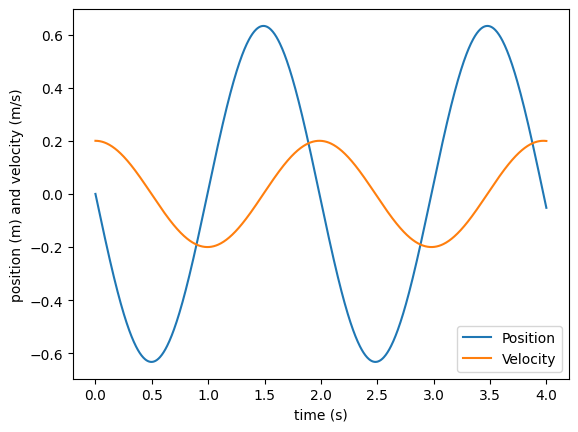

In [ ]:
# YOUR CODE HERE

def xosci(t):
    return 0.2 * np.cos(np.sqrt(10)*t)

def xderived(t):
    return -0.2 * np.sqrt(10) * np.sin(np.sqrt(10)*t)

tmin, tmax, n = 0, 4, 1000
t = np.linspace(tmin, tmax, n)
plt.plot(t, xderived(t))
plt.plot(t, xosci(t))
plt.ylabel('position (m) and velocity (m/s)')
plt.xlabel('time (s)')
plt.legend(['Position', 'Velocity'], loc = "lower right", fontsize=10)
plt.show()

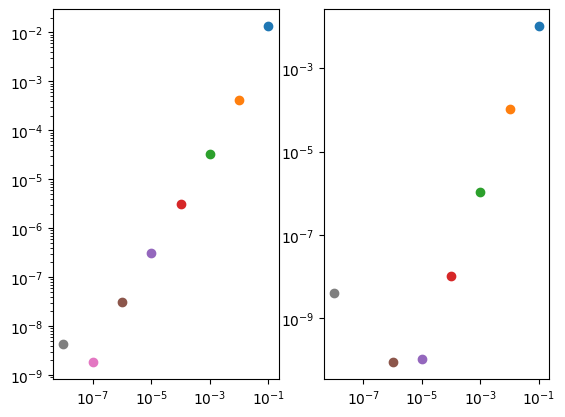

In [ ]:
import math
import matplotlib as mpl

fig,ax = plt.subplots(1,2)
x = 10.**-np.arange(1,9)

for i in range(1,9):
    forw = forward(xosci, 1.5, 10**-i)
    skillnad = xderived(1.5) - forw
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].scatter(10**-i,skillnad)

for i in range(1,9):
    cent = central(xosci, 1.5, 10**-i)
    skillnad = xderived(1.5) - cent
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].scatter(10**-i,skillnad)
    

### Feedback on chatGPT question (problem 6)
Do you have any feedback on this question designed by chatGPT? Is the level sufficient (or too high or too low)?

If you used chatGPT to answer this question, did you manage to get an answer that made sense?